In [1]:
import os
import sys

import seaborn as sns
import numpy as np
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import torch
import pandas as pd
sns.set(style='whitegrid', rc={
    'figure.figsize':(12,8),
    'legend.fontsize': 'large',
    'legend.title_fontsize': 'large',
    'axes.labelsize': 'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Lucida Grande'
})

from simulated_utils import compare
from simulated_utils import CtsBanditEnv

In [2]:
%matplotlib inline

In [15]:
 def plot_results(data):
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))
    sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', ax=axes[0], n_boot=1000)
    axes[0].set_ylabel('Mean Reward')
    a = data['pd_param_0_mean']
    b = data['pd_param_1_mean']
    data['mean'] = a / (a + b)
    data['std'] = (a * b / (a + b + 1)).apply(np.sqrt) / (a + b)
    sns.lineplot(data=data, x='iter', y='mean', hue='method', ax=axes[1], n_boot=1000)
    axes[1].set_ylabel('Beta Policy Mean')
    sns.lineplot(data=data, x='iter', y='std', hue='method', ax=axes[2], n_boot=1000)
    axes[2].set_ylabel('Beta Policy Standard Deviation')
    #sns.lineplot(data=data, x='iter', y='pd_param_0_mean', hue='method', ax=axes[1], n_boot=1000)
    #axes[1].set_ylabel('Beta Policy - Parameter alpha')
    #axes[1].set_ylim([1,3])
    #sns.lineplot(data=data, x='iter', y='pd_param_1_mean', hue='method', ax=axes[2], n_boot=1000)
    #axes[2].set_ylabel('Beta Policy - Parameter beta')
    #axes[2].set_ylim([0,1])

    handles, labels = axes.flatten()[0].get_legend_handles_labels()
    for ax in axes.flatten():
        ax.get_legend().remove()
        ax.set_xlabel('# Iterations')
    fig.legend(handles[1:], labels, loc='upper center', title='Method', ncol=4)
    plt.show()

In [4]:
def filter_df(df, **kwargs):
    for k,v in kwargs.items():
        df = df[df[k] == v]
    return df

In [5]:
env = CtsBanditEnv(noise_std=0.001)
compare(env, 'beta', n_steps=2, repeats=2,
        lr=1e-1, batch_size=1024, num_minibatches=1, ppo_epochs=10)

//anaconda3/envs/ppo/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


,iter,loss,mean_reward,pd_param_0_mean,pd_param_1_mean,method
0,0.0,-0.006145,0.151349,1.018150,1.018150,Reverse KL
1,1.0,-0.013218,0.148392,1.049201,1.011382,Reverse KL
0,0.0,-0.006739,0.167024,1.018150,1.018150,Reverse KL
1,1.0,-0.013048,0.163543,1.049207,1.008857,Reverse KL
0,0.0,-0.005893,0.166023,1.018150,1.018150,Forward KL
1,1.0,-0.015905,0.154270,1.049173,1.009152,Forward KL
0,0.0,-0.006637,0.140148,1.018150,1.018150,Forward KL
1,1.0,-0.011508,0.168026,1.049195,1.008129,Forward KL
0,0.0,-0.008462,0.148922,1.018150,1.018150,Clipping
1,1.0,-0.016042,0.156762,1.049371,1.007112,Clipping


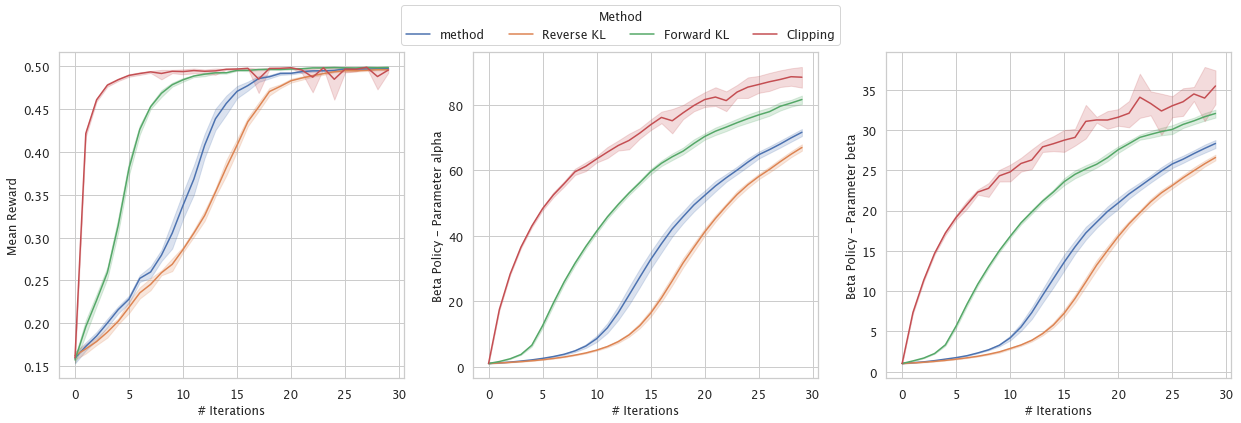

In [6]:
env = CtsBanditEnv(noise_std=0.001)
data = compare(env, 'beta', n_steps=30, repeats=10,
               lr=1e-1, batch_size=1024, num_minibatches=32, ppo_epochs=10)

plot_results(data)

//anaconda3/envs/ppo/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


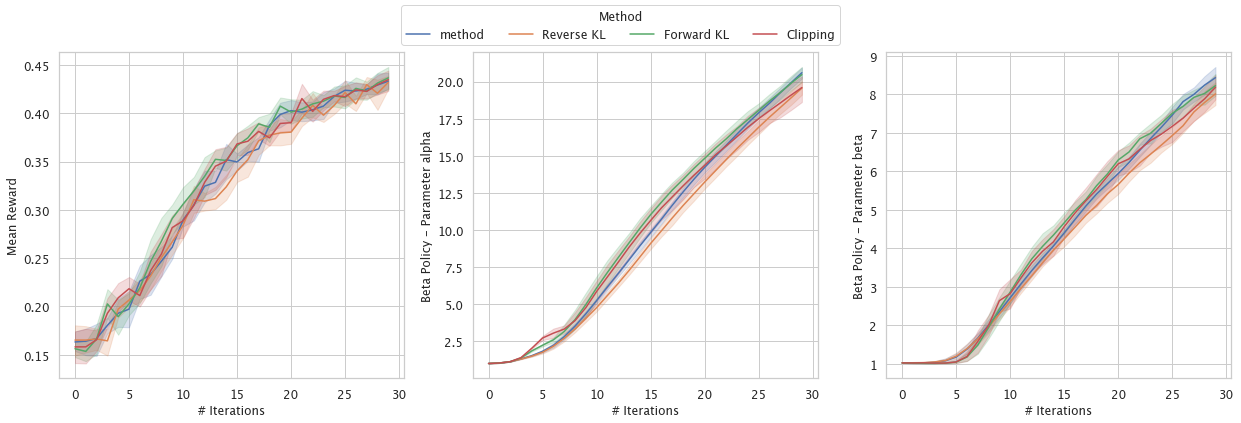

In [7]:
dataenv = CtsBanditEnv(noise_std=0.001)
data = compare(env, 'beta', n_steps=30, repeats=10,
               lr=1e-1, batch_size=128, num_minibatches=1, ppo_epochs=10)

plot_results(data)

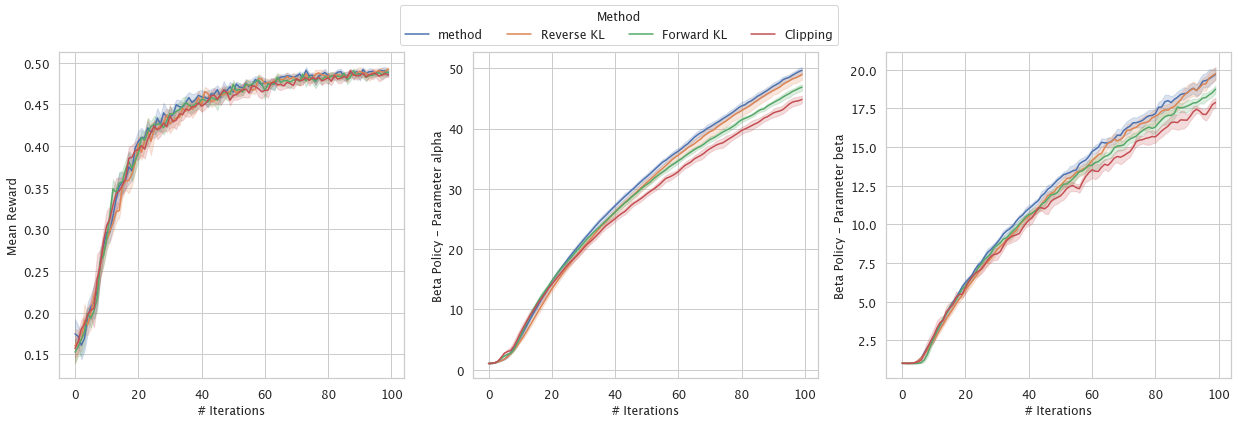

In [10]:
dataenv = CtsBanditEnv(noise_std=0.001)
data = compare(env, 'beta', n_steps=100, repeats=10,
               lr=1e-1, batch_size=128, num_minibatches=1, ppo_epochs=10)

plot_results(data)

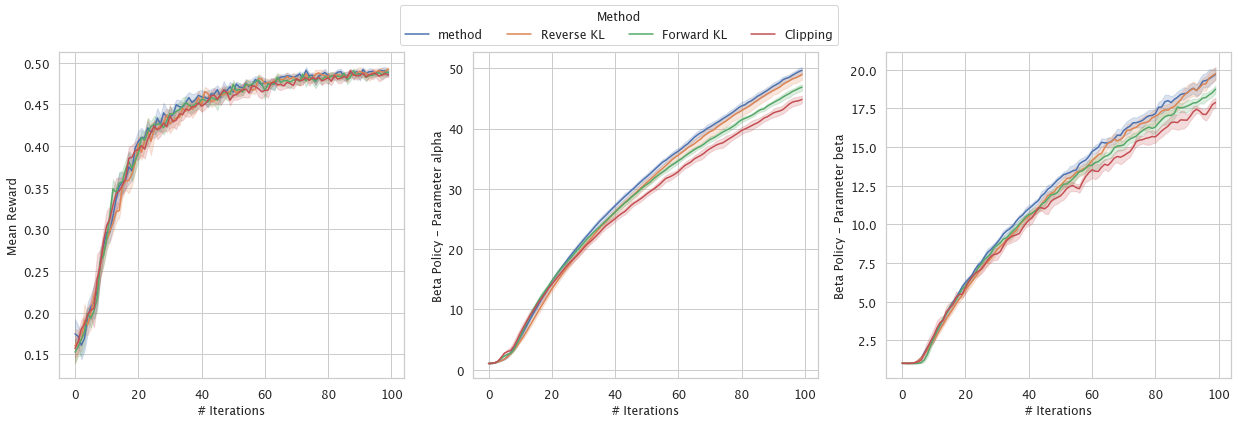

In [10]:
dataenv = CtsBanditEnv(noise_std=0.001)
data = compare(env, 'beta', n_steps=100, repeats=10,
               lr=1e-1, batch_size=128, num_minibatches=1, ppo_epochs=10)

plot_results(data)

//anaconda3/envs/ppo/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


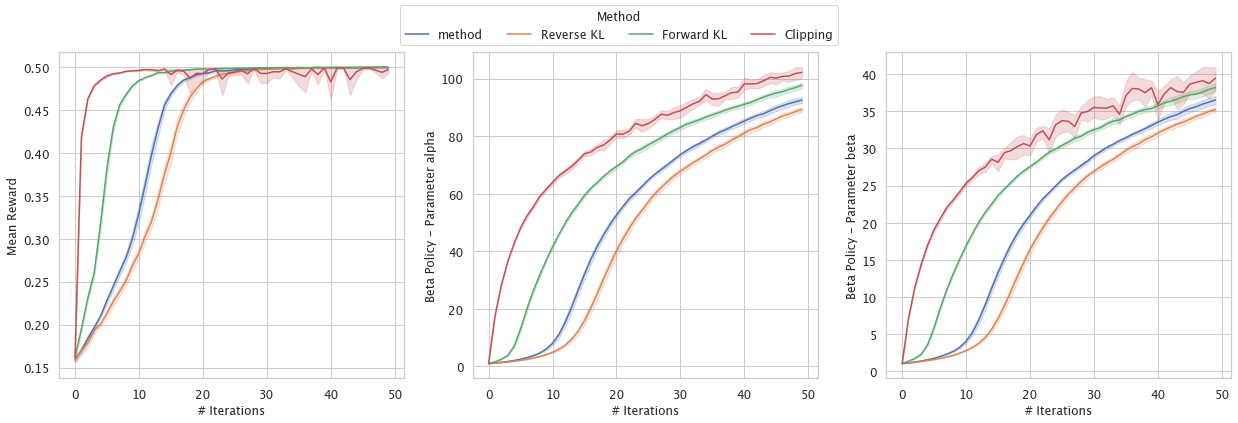

In [11]:
dataenv = CtsBanditEnv(noise_std=0.001)
data = compare(env, 'beta', n_steps=50, repeats=20,
               lr=1e-1, batch_size=1024, num_minibatches=32, ppo_epochs=10)

plot_results(data)

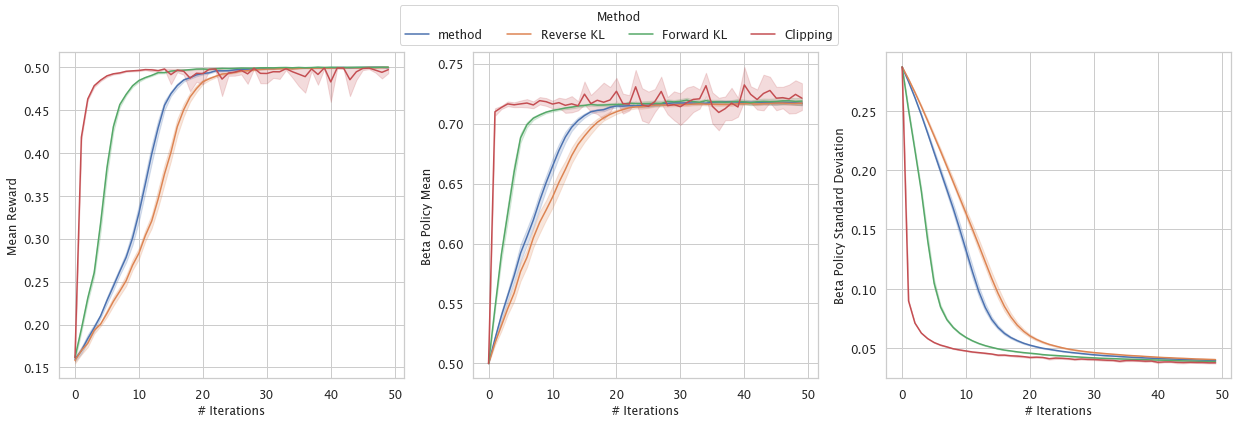

In [16]:
plot_results(data)

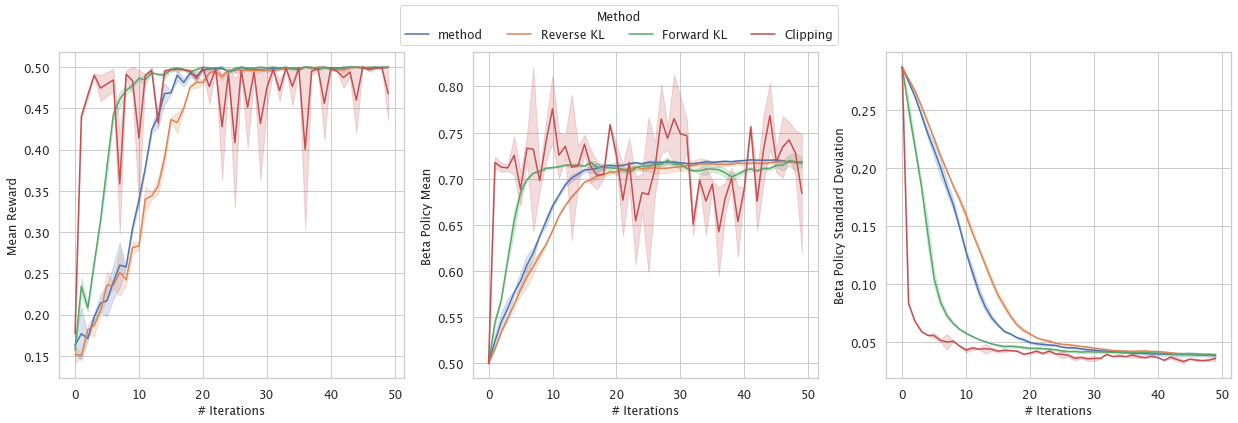

In [19]:
env = CtsBanditEnv(noise_std=0.001)
data_more_epochs = compare(env, 'beta', n_steps=50, repeats=2,
               lr=1e-1, batch_size=256, num_minibatches=8, ppo_epochs=50)

plot_results(data_more_epochs)